## Промышленность

<b>Задача проекта:</b> чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

<b>Цель проекта:</b> разработать модель, которая позволит предсказывать температуру стали на этапе обработки, с целью уменьшения потребления электроэнергии и оптимизации производственных расходов металлургического комбината.

<b>План:</b>

<b>I. Сбор общей информации. </b>

    •	Изучение общей информации о датасетах;
    •	Выявление пропусков в данных;
    •	Предположение о появлении пропусков;
    •	Анализ значений на дубликаты;
    •	Визуализация данных;
    •	Просмотр статистической информации (describe и corr).
    
<b>II.	Предобработка данных.</b>

    •	Объдинение файлов по ключу с помозью Inner;
    •    Изменение типов данных (если нужно);
    •	Заполнение пропусков (при возможности; в материалах заполнить 0);
    •	Посмотреть столбцы на наличие выбросов/аномальных значений и убрать их;
    •	Удалить мультиколлинеарные признаки;
    •    Вывести графики распредления признаков.

<b>III.	Обучение моделей.</b>
    
    •    Посмотреть на матрицу корреляций;
    •	Определение целевого признака;
    •	Масштабирование признаков;
    •	Подобрать гиперпараметры на разных моделях и получить наиболее хороший показатель MAE; 
    •	Выбор лучшей модели.

<b>IV.	Тестирование лучшей модели.</b>

    •	Протестировать данные на выбранной модели;
    •	Если показатели достаточно высокие, то оставить выбранные гиперпараметры;
    •    Сравнить с константной моделью;
    •	Проанализировать важность признаков;
    •    Сделать вывод по полученным результатам.


In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble  import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor

## Исследовательский анализ

In [3]:
arc = pd.read_csv('datasets/data_arc_new.csv')
bulk = pd.read_csv('datasets/data_bulk_new.csv')
bulk_time = pd.read_csv('datasets/data_bulk_time_new.csv')
gas = pd.read_csv('datasets/data_gas_new.csv')
temp = pd.read_csv('datasets/data_temp_new.csv')
wire = pd.read_csv('datasets/data_wire_new.csv')
wire_time = pd.read_csv('datasets/data_wire_time_new.csv')

In [4]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [5]:
arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [6]:
arc.isna().sum()

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

In [7]:
arc.corr()

,key,Активная мощность,Реактивная мощность
key,1.000000,-0.010220,-0.004834
Активная мощность,-0.010220,1.000000,0.031164
Реактивная мощность,-0.004834,0.031164,1.000000


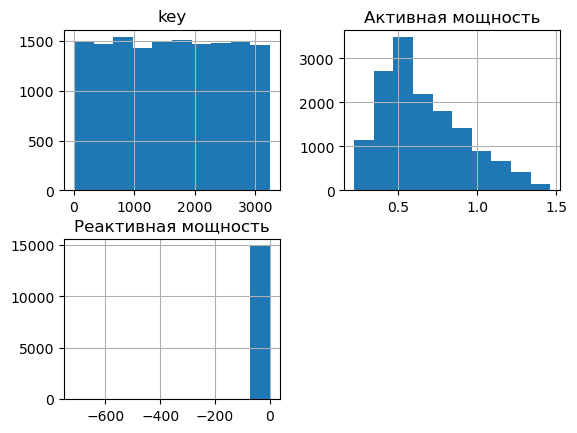

In [8]:
arc.hist();

In [9]:
bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [10]:
bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [11]:
bulk.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

In [12]:
bulk.corr()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,1.000000,-0.192066,-0.038643,-0.080335,-0.101955,-0.018074,-0.063539,-0.049425,NaN,0.262741,0.288135,-0.156748,-0.030981,0.050304,-0.149840,-0.169873
Bulk 1,-0.192066,1.000000,-0.073762,0.016731,-0.040465,-0.368980,0.141745,-0.086223,NaN,NaN,-0.278055,0.461895,0.370501,1.000000,0.409188,-0.119006
Bulk 2,-0.038643,-0.073762,1.000000,NaN,0.393882,0.070350,NaN,-0.010043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulk 3,-0.080335,0.016731,NaN,1.000000,-0.260918,0.144410,0.253080,NaN,NaN,0.072850,-0.244532,0.137997,0.011648,-0.582598,0.026257,-0.023689
Bulk 4,-0.101955,-0.040465,0.393882,-0.260918,1.000000,-0.077214,-0.333841,0.324940,NaN,0.766565,-0.516399,NaN,0.051112,-0.311659,0.022925,0.041190
Bulk 5,-0.018074,-0.368980,0.070350,0.144410,-0.077214,1.000000,-0.511112,0.304476,NaN,NaN,NaN,NaN,0.007650,NaN,-0.256040,-0.248216
Bulk 6,-0.063539,0.141745,NaN,0.253080,-0.333841,-0.511112,1.000000,NaN,NaN,NaN,NaN,-0.104251,-0.079822,0.844690,0.154429,-0.038363
Bulk 7,-0.049425,-0.086223,-0.010043,NaN,0.324940,0.304476,NaN,1.000000,NaN,NaN,NaN,NaN,0.538671,NaN,1.000000,NaN
Bulk 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulk 9,0.262741,NaN,NaN,0.072850,0.766565,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.946954,NaN,-0.479974,NaN


У некоторых признаков наблюдается высокая корреляция

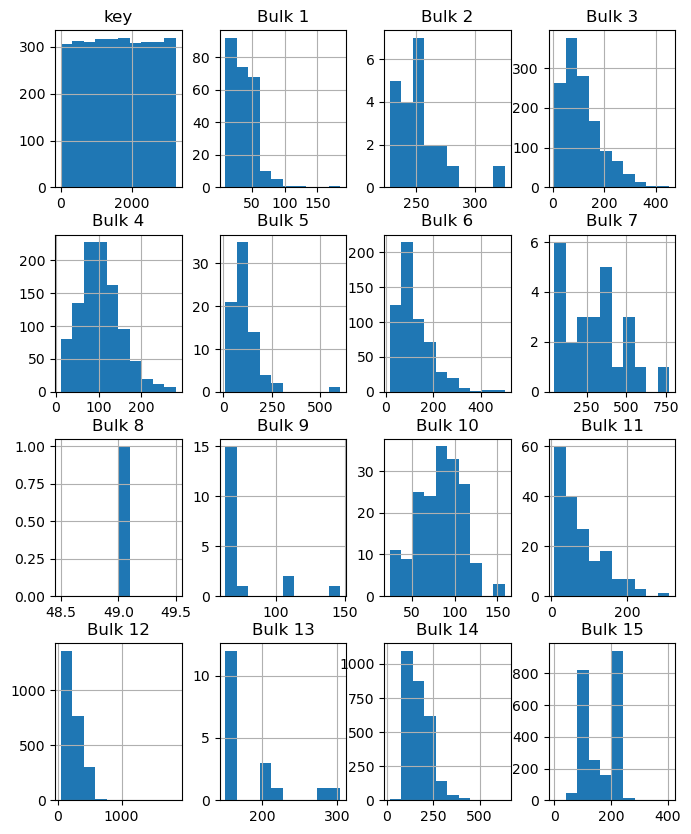

In [13]:
bulk.hist(figsize=(8,10));

In [14]:
bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [15]:
bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [16]:
bulk_time.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

In [17]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [18]:
gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [19]:
gas.isna().sum()

key      0
Газ 1    0
dtype: int64

In [20]:
gas.corr()

,key,Газ 1
key,1.000000,-0.040655
Газ 1,-0.040655,1.000000


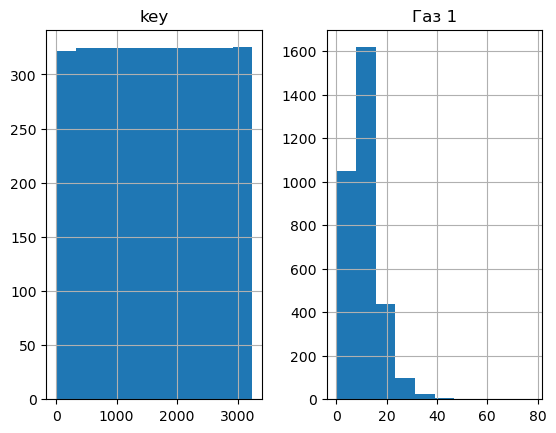

In [21]:
gas.hist();

In [22]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [23]:
temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [24]:
temp.isna().sum()

key                0
Время замера       0
Температура     3427
dtype: int64

In [25]:
temp.corr()

,key,Температура
key,1.00000,-0.05627
Температура,-0.05627,1.00000


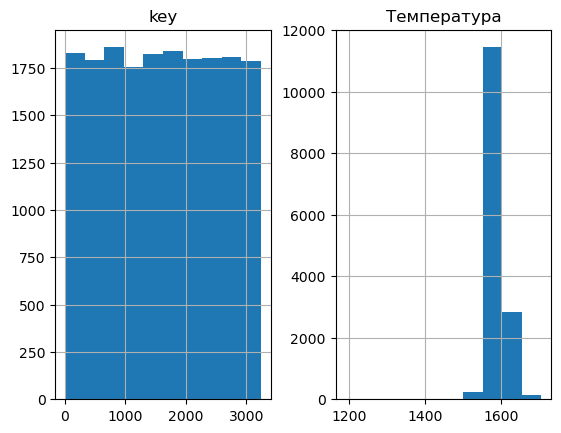

In [26]:
temp.hist();

In [27]:
wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [28]:
wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
wire.isna().sum()

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

In [30]:
wire.corr()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,1.000000,-0.083352,-0.005461,-0.084460,0.389064,NaN,0.082274,0.578898,0.323891,-0.012200
Wire 1,-0.083352,1.000000,-0.030892,0.724370,0.054001,NaN,-0.280807,-0.035072,0.068697,0.010104
Wire 2,-0.005461,-0.030892,1.000000,-0.081852,NaN,NaN,-0.265706,NaN,0.250477,0.011019
Wire 3,-0.084460,0.724370,-0.081852,1.000000,0.069854,NaN,-0.221602,-0.056948,NaN,NaN
Wire 4,0.389064,0.054001,NaN,0.069854,1.000000,NaN,0.237456,-0.404865,NaN,NaN
Wire 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wire 6,0.082274,-0.280807,-0.265706,-0.221602,0.237456,NaN,1.000000,-0.224093,NaN,NaN
Wire 7,0.578898,-0.035072,NaN,-0.056948,-0.404865,NaN,-0.224093,1.000000,NaN,NaN
Wire 8,0.323891,0.068697,0.250477,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Wire 9,-0.012200,0.010104,0.011019,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


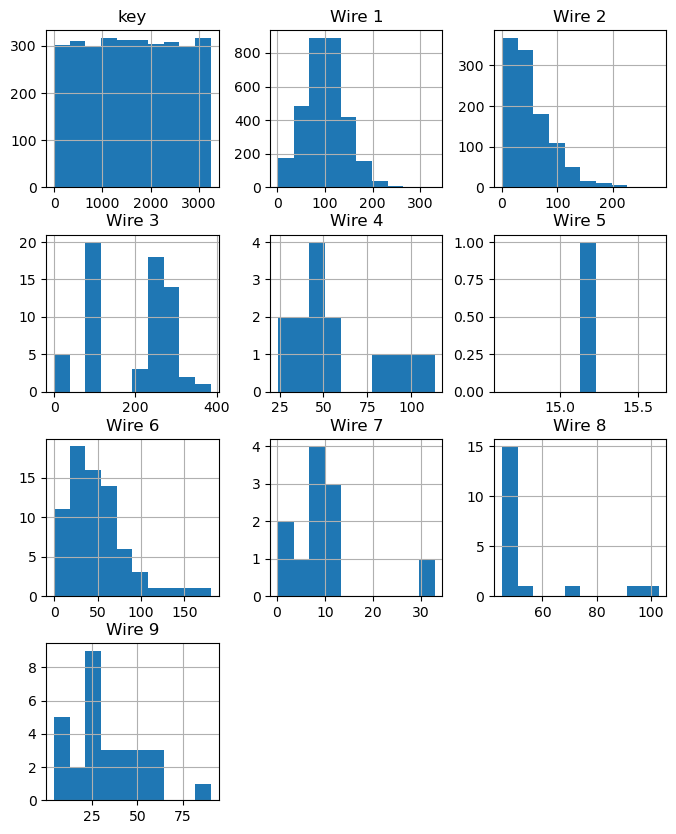

In [31]:
wire.hist(figsize=(8,10));

In [32]:
wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [33]:
wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
wire_time.isna().sum()

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

<b>Промежуточный вывод:</b> Много пропусков во многих файлах, из-за этого трудно проанализировать ту же корреляцию. Особо сильную коллинеарность я заметила только у признаков файла bulk

## Предобработка

Для начала переименуем столбцы:

In [35]:
arc.columns = ['key', 'start_of_arc','end_of_arc', 'real_power', 'reactive_power']
bulk.columns = ['key', 'bulk_1','bulk_2','bulk_3','bulk_4','bulk_5','bulk_6','bulk_7','bulk_8',
                     'bulk_9','bulk_10','bulk_11','bulk_12','bulk_13','bulk_14','bulk_15']
bulk_time.columns = ['key', 'bulk_1','bulk_2','bulk_3','bulk_4','bulk_5','bulk_6','bulk_7','bulk_8',
                     'bulk_9','bulk_10','bulk_11','bulk_12','bulk_13','bulk_14','bulk_15']
gas.columns = ['key', 'gas_1']
temp.columns = ['key', 'time','temperature']
wire.columns = ['key','wire_1','wire_2','wire_3','wire_4','wire_5','wire_6','wire_7','wire_8','wire_9']
wire_time.columns = ['key','wire_1','wire_2','wire_3','wire_4','wire_5','wire_6','wire_7','wire_8','wire_9']

### Работа с файлами

<b>Arc</b>

In [36]:
arc.describe()

,key,real_power,reactive_power
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


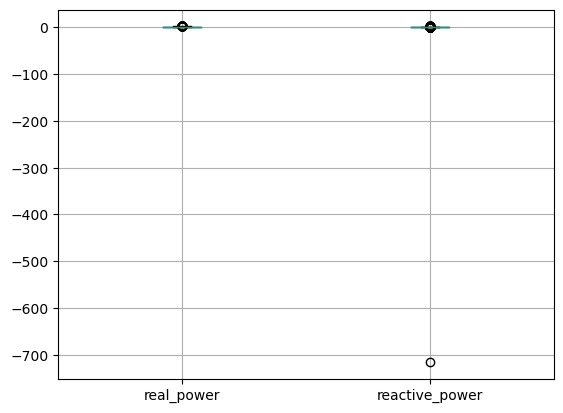

In [37]:
arc[['real_power', 'reactive_power']].boxplot();

Удалим те замеры, где реактивная мощность отрицательная и где есть всего 1 замер.

In [38]:
arc = arc.query('reactive_power > 0')

In [39]:
count = arc['key'].value_counts()
arc = arc.loc[arc['key'].isin(count[count > 1].index)]

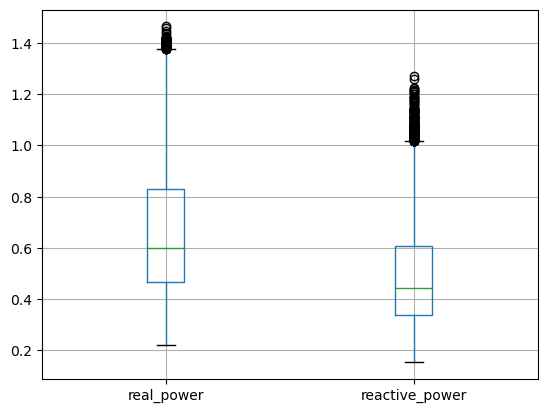

In [40]:
arc[['real_power','reactive_power']].boxplot();

Посмотрим на матрицу корреляций:

In [41]:
corr = arc.corr()
corr.style.background_gradient(cmap='cool')

,key,real_power,reactive_power
key,1.000000,-0.009925,-0.012897
real_power,-0.009925,1.000000,0.966395
reactive_power,-0.012897,0.966395,1.000000


Сильная корреляция между мощностями, но, думаю, это объективно. Можем рассчитать еще полную мощность по формуле:

$$S = \sqrt{P^2 + Q^2}$$

Где P - активная мощность, а Q - реактивная.

In [42]:
arc['apparent_power'] = (arc['real_power']**2 + arc['reactive_power']**2).apply(sqrt)

In [43]:
arc.head(10)

,key,start_of_arc,end_of_arc,real_power,reactive_power,apparent_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0.371123
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0.902319
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0.722536
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0.642824
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,1.079934
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351,0.440239
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527,0.332731
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962,0.860064
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517,0.955315
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856,1.373863


Сложим время каждой итерации 

In [44]:
arc['start_of_arc'] = arc[['start_of_arc']].astype('datetime64')
arc['end_of_arc'] = arc[['end_of_arc']].astype('datetime64')

In [45]:
arc['total_time'] = arc['end_of_arc'] - arc['start_of_arc']
arc['total_time'] = arc['total_time'].dt.total_seconds()

In [46]:
arc.head()

,key,start_of_arc,end_of_arc,real_power,reactive_power,apparent_power,total_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0.371123,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0.902319,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0.722536,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0.642824,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,1.079934,148.0


Сгруппируем по ключу и просуммируем:

In [47]:
arc = arc.groupby('key', as_index=False).sum()
arc

,key,real_power,reactive_power,apparent_power,total_time
0,1,3.036730,2.142821,3.718736,1098.0
1,2,2.139408,1.453357,2.588349,811.0
2,3,4.063641,2.937457,5.019223,655.0
3,4,2.706489,2.056992,3.400038,741.0
4,5,2.252950,1.687991,2.816980,869.0
...,...,...,...,...,...
3170,3237,2.541872,2.025417,3.250657,909.0
3171,3238,1.374821,1.038103,1.723937,546.0
3172,3239,4.848005,3.541541,6.014480,1216.0
3173,3240,3.317679,2.373552,4.082920,839.0


<b>Bulk</b>

In [48]:
corr = bulk.corr()
corr.style.background_gradient(cmap='RdPu')

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
key,1.000000,-0.192066,-0.038643,-0.080335,-0.101955,-0.018074,-0.063539,-0.049425,nan,0.262741,0.288135,-0.156748,-0.030981,0.050304,-0.149840,-0.169873
bulk_1,-0.192066,1.000000,-0.073762,0.016731,-0.040465,-0.368980,0.141745,-0.086223,nan,nan,-0.278055,0.461895,0.370501,1.000000,0.409188,-0.119006
bulk_2,-0.038643,-0.073762,1.000000,nan,0.393882,0.070350,nan,-0.010043,nan,nan,nan,nan,nan,nan,nan,nan
bulk_3,-0.080335,0.016731,nan,1.000000,-0.260918,0.144410,0.253080,nan,nan,0.072850,-0.244532,0.137997,0.011648,-0.582598,0.026257,-0.023689
bulk_4,-0.101955,-0.040465,0.393882,-0.260918,1.000000,-0.077214,-0.333841,0.324940,nan,0.766565,-0.516399,nan,0.051112,-0.311659,0.022925,0.041190
bulk_5,-0.018074,-0.368980,0.070350,0.144410,-0.077214,1.000000,-0.511112,0.304476,nan,nan,nan,nan,0.007650,nan,-0.256040,-0.248216
bulk_6,-0.063539,0.141745,nan,0.253080,-0.333841,-0.511112,1.000000,nan,nan,nan,nan,-0.104251,-0.079822,0.844690,0.154429,-0.038363
bulk_7,-0.049425,-0.086223,-0.010043,nan,0.324940,0.304476,nan,1.000000,nan,nan,nan,nan,0.538671,nan,1.000000,nan
bulk_8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bulk_9,0.262741,nan,nan,0.072850,0.766565,nan,nan,nan,nan,1.000000,nan,nan,0.946954,nan,-0.479974,nan


Думаю, можно удалить bulk_8, т.к. в нем полностью отсутсвуют значения.

In [49]:
bulk = bulk.drop('bulk_8', axis=1)

In [50]:
bulk.isna().sum()

key           0
bulk_1     2877
bulk_2     3107
bulk_3     1831
bulk_4     2115
bulk_5     3052
bulk_6     2553
bulk_7     3104
bulk_9     3110
bulk_10    2953
bulk_11    2952
bulk_12     679
bulk_13    3111
bulk_14     323
bulk_15     881
dtype: int64

Предположим, что пропуски связаны с тем, что сыпучие материалы, в принципе, не добавляли. Заменим пропуски на 0.

In [51]:
bulk = bulk.fillna(0)

In [52]:
bulk.isna().sum()

key        0
bulk_1     0
bulk_2     0
bulk_3     0
bulk_4     0
bulk_5     0
bulk_6     0
bulk_7     0
bulk_9     0
bulk_10    0
bulk_11    0
bulk_12    0
bulk_13    0
bulk_14    0
bulk_15    0
dtype: int64

In [53]:
bulk.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


In [54]:
corr = bulk.corr()
corr.style.background_gradient(cmap='RdPu')

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
key,1.000000,-0.064900,0.011159,0.015479,-0.067873,0.024842,-0.011109,0.041140,-0.020741,0.026804,0.025012,-0.015900,-0.006753,-0.087584,-0.049414
bulk_1,-0.064900,1.000000,0.259609,-0.007222,0.050981,0.088394,0.010362,0.257701,-0.020056,-0.026729,-0.037120,0.285582,0.003179,0.183780,0.001814
bulk_2,0.011159,0.259609,1.000000,-0.053374,0.043135,0.412000,-0.033091,0.757486,-0.006316,-0.019493,-0.005740,-0.110075,-0.006192,-0.157956,-0.114487
bulk_3,0.015479,-0.007222,-0.053374,1.000000,-0.266968,-0.003587,0.073600,-0.043125,0.041242,-0.087810,-0.011939,0.008833,-0.007709,0.020869,0.018668
bulk_4,-0.067873,0.050981,0.043135,-0.266968,1.000000,0.024622,-0.232814,0.045005,-0.004691,-0.078468,-0.115261,0.098192,0.010349,-0.093962,0.111832
bulk_5,0.024842,0.088394,0.412000,-0.003587,0.024622,1.000000,-0.003383,0.335044,-0.009483,-0.029270,-0.019058,-0.082443,-0.009297,-0.077825,-0.074282
bulk_6,-0.011109,0.010362,-0.033091,0.073600,-0.232814,-0.003383,1.000000,-0.029312,-0.029715,-0.091713,0.199409,-0.136876,0.025802,0.199680,-0.101289
bulk_7,0.041140,0.257701,0.757486,-0.043125,0.045005,0.335044,-0.029312,1.000000,-0.005757,-0.017769,-0.009379,-0.049310,-0.005644,-0.110137,-0.102531
bulk_9,-0.020741,-0.020056,-0.006316,0.041242,-0.004691,-0.009483,-0.029715,-0.005757,1.000000,-0.017505,-0.014419,-0.072405,-0.005560,0.035418,-0.096869
bulk_10,0.026804,-0.026729,-0.019493,-0.087810,-0.078468,-0.029270,-0.091713,-0.017769,-0.017505,1.000000,-0.044504,0.032095,0.001358,-0.049872,0.058049


<b>Wire</b>

In [55]:
corr = wire.corr()
corr.style.background_gradient(cmap='RdPu')

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
key,1.000000,-0.083352,-0.005461,-0.084460,0.389064,nan,0.082274,0.578898,0.323891,-0.012200
wire_1,-0.083352,1.000000,-0.030892,0.724370,0.054001,nan,-0.280807,-0.035072,0.068697,0.010104
wire_2,-0.005461,-0.030892,1.000000,-0.081852,nan,nan,-0.265706,nan,0.250477,0.011019
wire_3,-0.084460,0.724370,-0.081852,1.000000,0.069854,nan,-0.221602,-0.056948,nan,nan
wire_4,0.389064,0.054001,nan,0.069854,1.000000,nan,0.237456,-0.404865,nan,nan
wire_5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
wire_6,0.082274,-0.280807,-0.265706,-0.221602,0.237456,nan,1.000000,-0.224093,nan,nan
wire_7,0.578898,-0.035072,nan,-0.056948,-0.404865,nan,-0.224093,1.000000,nan,nan
wire_8,0.323891,0.068697,0.250477,nan,nan,nan,nan,nan,1.000000,nan
wire_9,-0.012200,0.010104,0.011019,nan,nan,nan,nan,nan,nan,1.000000


Удалим wire_5 из-за пустоты.

In [56]:
wire = wire.drop('wire_5', axis=1)

In [57]:
wire.isna().sum()

key          0
wire_1      26
wire_2    2002
wire_3    3018
wire_4    3067
wire_6    3008
wire_7    3070
wire_8    3062
wire_9    3052
dtype: int64

Пропуски, также как и в bulk, заполним 0.

In [58]:
wire = wire.fillna(0)

In [59]:
wire.isna().sum()

key       0
wire_1    0
wire_2    0
wire_3    0
wire_4    0
wire_6    0
wire_7    0
wire_8    0
wire_9    0
dtype: int64

In [60]:
corr = wire.corr()
corr.style.background_gradient(cmap='RdPu')

,key,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9
key,1.000000,-0.070648,0.014930,0.008904,0.016976,0.009915,0.043671,-0.018350,-0.010187
wire_1,-0.070648,1.000000,-0.047824,0.063818,-0.132207,-0.139721,-0.098728,0.025705,0.019411
wire_2,0.014930,-0.047824,1.000000,0.143669,-0.032135,-0.064760,-0.024473,0.061162,0.205339
wire_3,0.008904,0.063818,0.143669,1.000000,0.150634,0.161709,0.126731,-0.009627,-0.010799
wire_4,0.016976,-0.132207,-0.032135,0.150634,1.000000,0.386320,0.221907,-0.004578,-0.005135
wire_6,0.009915,-0.139721,-0.064760,0.161709,0.386320,1.000000,0.269873,-0.009564,-0.010729
wire_7,0.043671,-0.098728,-0.024473,0.126731,0.221907,0.269873,1.000000,-0.003486,-0.003911
wire_8,-0.018350,0.025705,0.061162,-0.009627,-0.004578,-0.009564,-0.003486,1.000000,-0.006360
wire_9,-0.010187,0.019411,0.205339,-0.010799,-0.005135,-0.010729,-0.003911,-0.006360,1.000000


<b>Gas</b>

In [61]:
gas.describe()

,key,gas_1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


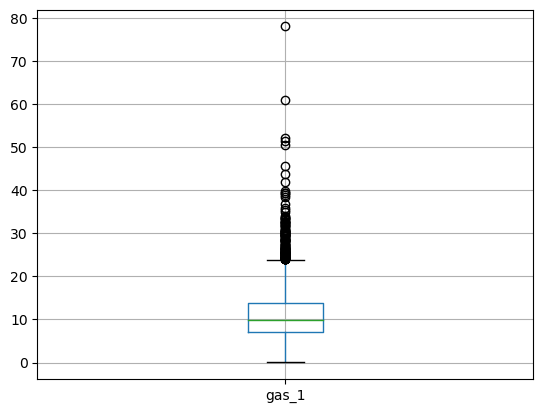

In [62]:
gas.boxplot(column='gas_1');

Оставляем без изменений.

<b>Temp</b>

In [63]:
temp.describe()

,key,temperature
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


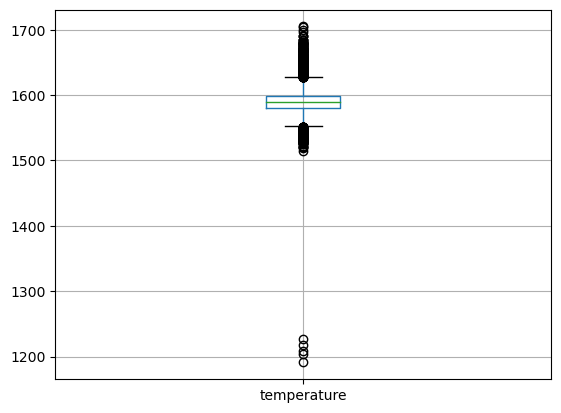

In [64]:
temp.boxplot(column='temperature');

Удалим замеры, где температура меньше 1500 градусов и где только один замер

In [65]:
temp = temp.query('temperature > 1500')

In [66]:
temp.describe()

,key,temperature
count,14660.000000,14660.000000
mean,1325.369236,1590.852729
std,787.407873,19.143141
min,1.000000,1515.000000
25%,654.000000,1580.000000
50%,1314.000000,1590.000000
75%,1962.250000,1599.000000
max,3241.000000,1705.000000


In [67]:
#count = temp['key'].value_counts()
#temp = temp.loc[temp['key'].isin(count[count > 1].index)]

In [68]:
temp.describe()

,key,temperature
count,14660.000000,14660.000000
mean,1325.369236,1590.852729
std,787.407873,19.143141
min,1.000000,1515.000000
25%,654.000000,1580.000000
50%,1314.000000,1590.000000
75%,1962.250000,1599.000000
max,3241.000000,1705.000000


In [69]:
temp.head()

,key,time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


Приведем время к типу datetime и посчитаем начальную температуру

In [70]:
temp['time'] = temp[['time']].astype('datetime64')

In [71]:
temp.head()

,key,time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [72]:
temp = temp.groupby(by = 'key', as_index = False).agg(['first', 'last'])
temp.columns = ['first_time', 'last_time', 'first_temperature', 'last_temperature']

In [73]:
temp.head()

,first_time,last_time,first_temperature,last_temperature
key,,,,
1,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0
2,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0
3,2019-05-03 12:06:44,2019-05-03 12:35:57,1596.0,1599.0
4,2019-05-03 12:39:27,2019-05-03 12:59:47,1601.0,1625.0
5,2019-05-03 13:11:03,2019-05-03 13:36:39,1576.0,1602.0


In [74]:
temp = temp.query('first_temperature != last_temperature')

In [75]:
corr = temp.corr()
corr.style.background_gradient(cmap='RdPu')

,first_temperature,last_temperature
first_temperature,1.000000,0.431312
last_temperature,0.431312,1.000000


### Объединение файлов

Объединим все файлы по ключам

In [76]:
df = temp.merge(arc, on='key', how='inner')
df = df.merge(bulk, on='key', how='inner')
df = df.merge(wire, on='key', how='inner')
df = df.merge(gas, on='key', how='inner')

In [77]:
df.head()

,key,first_time,last_time,first_temperature,last_temperature,real_power,reactive_power,apparent_power,total_time,bulk_1,...,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,gas_1
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0,3.036730,2.142821,3.718736,1098.0,0.0,...,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,29.749986
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0,2.139408,1.453357,2.588349,811.0,0.0,...,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,12.555561
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,1596.0,1599.0,4.063641,2.937457,5.019223,655.0,0.0,...,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,28.554793
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,1601.0,1625.0,2.706489,2.056992,3.400038,741.0,0.0,...,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,18.841219
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,1576.0,1602.0,2.252950,1.687991,2.816980,869.0,0.0,...,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,5.413692


Столбцы с временем нам больше не понадобятся, можно их удалить:

In [78]:
df = df.drop('first_time', axis=1)
df = df.drop('last_time', axis=1)

In [79]:
df.tail()

,key,first_temperature,last_temperature,real_power,reactive_power,apparent_power,total_time,bulk_1,bulk_2,bulk_3,...,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,gas_1
2262,2495,1570.0,1591.0,3.168133,2.210936,3.868721,723.0,0.0,0.0,21.0,...,223.0,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,7.125735
2263,2496,1554.0,1591.0,4.174918,2.872031,5.070316,940.0,0.0,0.0,0.0,...,226.0,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,9.412616
2264,2497,1571.0,1589.0,3.605239,2.452092,4.360918,569.0,0.0,0.0,0.0,...,226.0,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,6.271699
2265,2498,1591.0,1594.0,3.202310,2.239820,3.909917,750.0,0.0,0.0,90.0,...,207.0,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,14.953657
2266,2499,1569.0,1603.0,1.737084,1.296836,2.169252,883.0,0.0,0.0,47.0,...,227.0,110.160958,50.00528,0.0,0.0,0.0,0.0,0.0,0.0,11.336151


In [80]:
corr = df.corr()
corr.style.background_gradient(cmap='RdPu')

,key,first_temperature,last_temperature,real_power,reactive_power,apparent_power,total_time,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,gas_1
key,1.000000,-0.019292,-0.100767,-0.023098,-0.021332,-0.022456,-0.032656,-0.074591,-0.006029,-0.006564,-0.027233,0.036091,0.008176,0.053267,-0.040003,0.062446,0.034716,0.026015,-0.015752,-0.117673,-0.047117,-0.019799,0.043285,-0.027244,0.050127,-0.007961,0.037600,-0.036235,0.013695,-0.045364
first_temperature,-0.019292,1.000000,0.300795,-0.139059,-0.136953,-0.138571,-0.379010,0.085004,0.144610,-0.111068,0.163585,0.081615,-0.125780,0.089966,-0.032747,0.039349,-0.110385,-0.069953,0.021663,-0.167516,-0.050697,0.260757,-0.102080,-0.001672,0.078146,0.022746,0.054000,-0.029148,-0.004576,0.043404
last_temperature,-0.100767,0.300795,1.000000,0.167879,0.162498,0.166236,0.273729,-0.076464,-0.084173,-0.039519,0.183316,-0.029465,-0.179520,-0.109333,-0.016729,0.060815,-0.108940,0.262905,-0.011511,0.112702,0.263807,0.311845,-0.207836,-0.048940,-0.162598,-0.085999,-0.139593,-0.011332,-0.028614,0.053870
real_power,-0.023098,-0.139059,0.167879,1.000000,0.992106,0.998989,0.709015,0.098504,0.091955,0.093873,-0.000810,0.072486,0.138158,0.148443,0.026276,0.002611,0.074883,0.267583,0.106542,0.283334,0.145993,0.136114,0.072254,0.053482,0.104648,0.055089,0.062550,0.033715,-0.015891,0.364958
reactive_power,-0.021332,-0.136953,0.162498,0.992106,1.000000,0.996737,0.700587,0.094855,0.088494,0.091604,-0.001426,0.071690,0.137327,0.145957,0.021283,0.000248,0.074041,0.267339,0.104131,0.279270,0.144612,0.136308,0.071269,0.054382,0.103034,0.052896,0.068132,0.028119,-0.012250,0.361823
apparent_power,-0.022456,-0.138571,0.166236,0.998989,0.996737,1.000000,0.707318,0.097377,0.090917,0.093271,-0.001040,0.072363,0.138036,0.147813,0.024554,0.001742,0.074668,0.267959,0.105879,0.282387,0.145747,0.136460,0.072052,0.053867,0.104275,0.054430,0.064686,0.031795,-0.014524,0.364501
total_time,-0.032656,-0.379010,0.273729,0.709015,0.700587,0.707318,1.000000,0.101026,0.037308,0.085668,-0.034395,0.010747,0.166942,0.085289,0.011401,-0.018851,0.089288,0.453192,0.130966,0.448574,0.278202,0.050703,0.062558,0.031258,0.054644,0.040484,0.027580,0.016491,-0.004685,0.391838
bulk_1,-0.074591,0.085004,-0.076464,0.098504,0.094855,0.097377,0.101026,1.000000,0.226027,-0.011901,0.041691,0.060399,-0.005465,0.238662,-0.020187,-0.023833,-0.036951,0.327002,-0.010656,0.207749,-0.003973,0.015308,-0.011212,0.019954,0.147097,0.149197,0.083917,-0.019961,0.012538,0.238460
bulk_2,-0.006029,0.144610,-0.084173,0.091955,0.088494,0.090917,0.037308,0.226027,1.000000,-0.047826,0.041317,0.360158,-0.030404,0.679314,-0.005480,-0.018451,0.001917,-0.101560,-0.005746,-0.145525,-0.108672,-0.171847,-0.039514,0.223024,0.699304,0.558799,0.431712,-0.005418,-0.006846,0.219114
bulk_3,-0.006564,-0.111068,-0.039519,0.093873,0.091604,0.093271,0.085668,-0.011901,-0.047826,1.000000,-0.294738,-0.007842,0.067521,-0.034251,0.010808,-0.086866,-0.007602,0.014810,-0.014110,0.006909,-0.017474,0.037477,0.095620,0.004841,-0.041336,0.006209,-0.019836,0.004281,0.002349,0.053767


In [81]:
df = df.drop('bulk_9', axis=1)

In [82]:
corr = df.corr()
corr.style.background_gradient(cmap='RdPu')

,key,first_temperature,last_temperature,real_power,reactive_power,apparent_power,total_time,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,gas_1
key,1.000000,-0.019292,-0.100767,-0.023098,-0.021332,-0.022456,-0.032656,-0.074591,-0.006029,-0.006564,-0.027233,0.036091,0.008176,0.053267,0.062446,0.034716,0.026015,-0.015752,-0.117673,-0.047117,-0.019799,0.043285,-0.027244,0.050127,-0.007961,0.037600,-0.036235,0.013695,-0.045364
first_temperature,-0.019292,1.000000,0.300795,-0.139059,-0.136953,-0.138571,-0.379010,0.085004,0.144610,-0.111068,0.163585,0.081615,-0.125780,0.089966,0.039349,-0.110385,-0.069953,0.021663,-0.167516,-0.050697,0.260757,-0.102080,-0.001672,0.078146,0.022746,0.054000,-0.029148,-0.004576,0.043404
last_temperature,-0.100767,0.300795,1.000000,0.167879,0.162498,0.166236,0.273729,-0.076464,-0.084173,-0.039519,0.183316,-0.029465,-0.179520,-0.109333,0.060815,-0.108940,0.262905,-0.011511,0.112702,0.263807,0.311845,-0.207836,-0.048940,-0.162598,-0.085999,-0.139593,-0.011332,-0.028614,0.053870
real_power,-0.023098,-0.139059,0.167879,1.000000,0.992106,0.998989,0.709015,0.098504,0.091955,0.093873,-0.000810,0.072486,0.138158,0.148443,0.002611,0.074883,0.267583,0.106542,0.283334,0.145993,0.136114,0.072254,0.053482,0.104648,0.055089,0.062550,0.033715,-0.015891,0.364958
reactive_power,-0.021332,-0.136953,0.162498,0.992106,1.000000,0.996737,0.700587,0.094855,0.088494,0.091604,-0.001426,0.071690,0.137327,0.145957,0.000248,0.074041,0.267339,0.104131,0.279270,0.144612,0.136308,0.071269,0.054382,0.103034,0.052896,0.068132,0.028119,-0.012250,0.361823
apparent_power,-0.022456,-0.138571,0.166236,0.998989,0.996737,1.000000,0.707318,0.097377,0.090917,0.093271,-0.001040,0.072363,0.138036,0.147813,0.001742,0.074668,0.267959,0.105879,0.282387,0.145747,0.136460,0.072052,0.053867,0.104275,0.054430,0.064686,0.031795,-0.014524,0.364501
total_time,-0.032656,-0.379010,0.273729,0.709015,0.700587,0.707318,1.000000,0.101026,0.037308,0.085668,-0.034395,0.010747,0.166942,0.085289,-0.018851,0.089288,0.453192,0.130966,0.448574,0.278202,0.050703,0.062558,0.031258,0.054644,0.040484,0.027580,0.016491,-0.004685,0.391838
bulk_1,-0.074591,0.085004,-0.076464,0.098504,0.094855,0.097377,0.101026,1.000000,0.226027,-0.011901,0.041691,0.060399,-0.005465,0.238662,-0.023833,-0.036951,0.327002,-0.010656,0.207749,-0.003973,0.015308,-0.011212,0.019954,0.147097,0.149197,0.083917,-0.019961,0.012538,0.238460
bulk_2,-0.006029,0.144610,-0.084173,0.091955,0.088494,0.090917,0.037308,0.226027,1.000000,-0.047826,0.041317,0.360158,-0.030404,0.679314,-0.018451,0.001917,-0.101560,-0.005746,-0.145525,-0.108672,-0.171847,-0.039514,0.223024,0.699304,0.558799,0.431712,-0.005418,-0.006846,0.219114
bulk_3,-0.006564,-0.111068,-0.039519,0.093873,0.091604,0.093271,0.085668,-0.011901,-0.047826,1.000000,-0.294738,-0.007842,0.067521,-0.034251,-0.086866,-0.007602,0.014810,-0.014110,0.006909,-0.017474,0.037477,0.095620,0.004841,-0.041336,0.006209,-0.019836,0.004281,0.002349,0.053767


Отдельно рассмотрим корреляцию с целевым признаком - конечной температурой

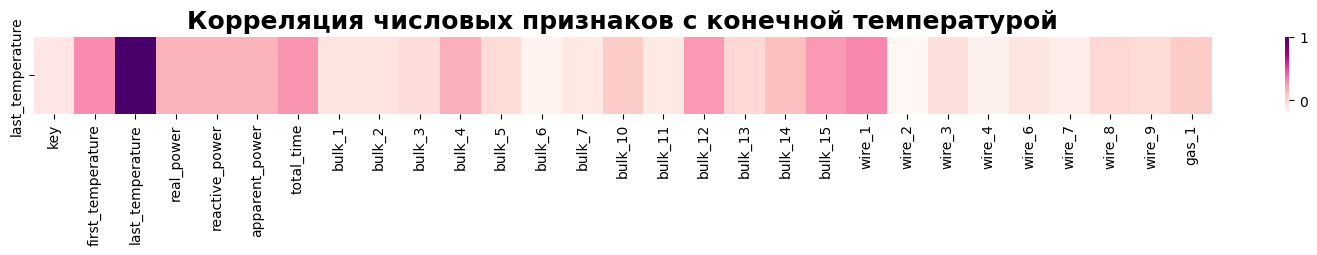

In [83]:
numcorr=df.corr()
f, ax=plt.subplots(figsize=(19,1))
sns.heatmap(numcorr.sort_values(by=['last_temperature'], ascending=False).head(1), cmap='RdPu')
plt.title("Корреляция числовых признаков с конечной температурой", weight='bold', fontsize=18)
plt.show()

<b>Вывод: </b>Мультиколлинеарности между признаками не наблюдается, признаки с сильной связью были удалены. Также были удалены некоторые столбцы (со временем), которые больше не несут пользы, и признаки, которые не содержали вообще никаких данных (bulk_8, wire_5). Были добавлены несколько дополнительных признаков (общее время, общая мощность).

### Графики распредления

Посмотрим на графики распредления некоторых признаков

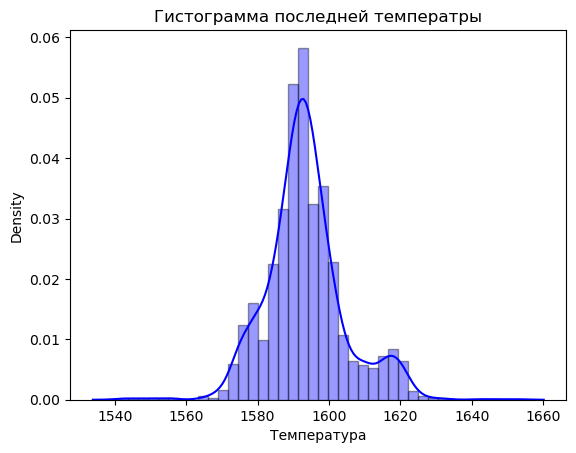

In [84]:
sns.distplot(df['last_temperature'], hist=True, kde=True,
             bins=(40), color = 'blue', 
             hist_kws={'edgecolor':'black'})

plt.title('Гистограмма последней температры');
plt.xlabel('Температура');

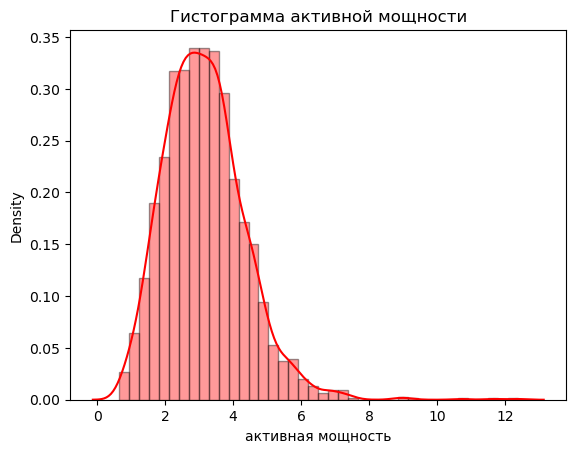

In [85]:
sns.distplot(df['real_power'], hist=True, kde=True,
             bins=(40), color = 'red', 
             hist_kws={'edgecolor':'black'})

plt.title('Гистограмма активной мощности');
plt.xlabel('активная мощность');

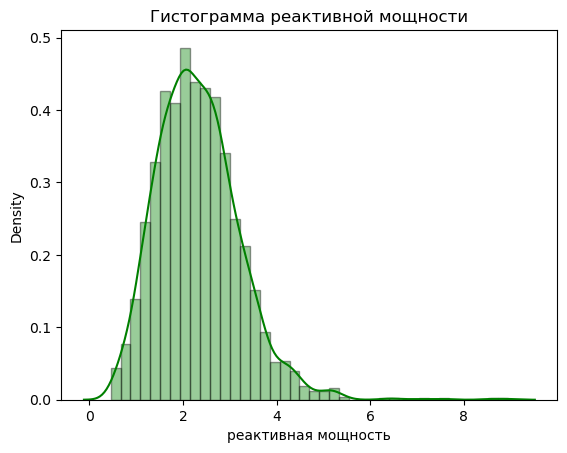

In [86]:
sns.distplot(df['reactive_power'], hist=True, kde=True,
             bins=(40), color = 'green', 
             hist_kws={'edgecolor':'black'})

plt.title('Гистограмма реактивной мощности');
plt.xlabel('реактивная мощность');

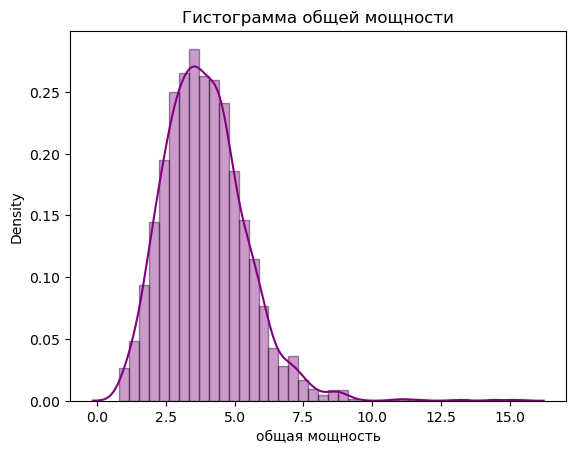

In [87]:
sns.distplot(df['apparent_power'], hist=True, kde=True,
             bins=(40), color = '#800080', 
             hist_kws={'edgecolor':'black'})

plt.title('Гистограмма общей мощности');
plt.xlabel('общая мощность');

<b>Вывод: </b>Все графики признаков имеют нормальное распредление.

## Обучение моделей

Выделяем целевой признак и разбиваем на выборки:

In [88]:
target = df['last_temperature']
features = df.drop(['last_temperature', 'key'],axis=1)

In [89]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target,
                                                                                          test_size=0.25,
                                                                                          random_state=50623)

In [90]:
print(features_train.shape)
print(features_valid.shape)
print(target_train.shape)
print(target_valid.shape)

(1700, 27)
(567, 27)
(1700,)
(567,)


Чтобы избежать разного масштаба признаков - стандартизируем их с помощью scaler

In [91]:
pd.options.mode.chained_assignment = None #чтоб предупреждение не выскакивало

In [92]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)

В качестве моделей будем использовать: RandomForestRegressor, CatBoostRegressor, LightGBM, LinearRegression

Подбирать параметры будем с помощью GridSearch

In [93]:
def GridSearch(model, parametrs):
    start = time.time()
    
    grid = GridSearchCV(model, parametrs, scoring='neg_mean_absolute_error', refit='neg_mean_absolute_error', cv=5, n_jobs=-1)
    grid.fit(features_train, target_train)
    predict = grid.predict(features_train)
    end = time.time()
    
    parametrs = grid.best_params_
    mae = grid.best_score_*-1
    r2 = r2_score(target_train,predict)
    
    lead_time = (end-start)/60
    return parametrs, mae, r2, lead_time

<b>RandomForestRegressor</b>

In [94]:
model_forest = RandomForestRegressor() 
parametrs = {'n_estimators': range(100, 601, 50), 
    'max_depth': range(6), 
    'min_samples_split': range(2, 6, 2), 
    'random_state' : [50623]}
parametrs_forest, mae_forest, r2_forest, lead_time_forest = GridSearch(model_forest, parametrs) 
print('Лучшие параметры', parametrs_forest) 
print('MAE:', {mae_forest}) 
print('r2:', {r2_forest}) 
print('Время выполнения:', {lead_time_forest})

Лучшие параметры {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 250, 'random_state': 50623}
MAE: {6.4171219024341895}
r2: {0.5343537444379265}
Время выполнения: {1.8562747359275817}


В идеале R2 должен стремиться к 1, тогда можно сказать, что модель идеальна. Показтель 0,5 означает среднее качество модели

<b>LGBM</b>

In [95]:
model_lgbm = LGBMRegressor() 
parametrs = [{'learning_rate': [0.1, 0.2, 0.5, 0.8], 
    'max_depth': range(10),
    'n_estimators': range(100, 301, 50),
    'random_state' : [50623]}]
parametrs_lgbm, mae_lgbm, r2_lgbm, lead_time_lgbm = GridSearch(model_lgbm, parametrs) 
print('Лучшие параметры:', parametrs_lgbm) 
print('MAE:', {mae_lgbm}) 
print('r2:', {r2_lgbm}) 
print('Время выполнения:', {lead_time_lgbm})

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'random_state': 50623}
MAE: {6.214507416093872}
r2: {0.6843987733074762}
Время выполнения: {0.23571797609329223}


В идеале R2 должен стремиться к 1, тогда можно сказать, что модель идеальна. Показатель 0,68 означает относительно неплохое качество модели

<b>CatBoost</b>

In [96]:
model_cat = CatBoostRegressor()
parametrs = {'iterations': [90], 
             'max_depth': [4, 16], 
             'random_state' : [50623]}
parametrs_cat, mae_cat, r2_cat, lead_time_cat = GridSearch(model_cat, parametrs) 
print('Лучшие параметры:', parametrs_cat) 
print('MAE:', {mae_cat}) 
print('r2:', {r2_cat}) 
print('Время выполнения:', {lead_time_cat})

Learning rate set to 0.315349
0:	learn: 10.4787953	total: 137ms	remaining: 12.2s
1:	learn: 10.0108903	total: 140ms	remaining: 6.17s
2:	learn: 9.7044535	total: 144ms	remaining: 4.16s
3:	learn: 9.4784113	total: 147ms	remaining: 3.16s
4:	learn: 9.1891639	total: 150ms	remaining: 2.55s
5:	learn: 8.8709332	total: 153ms	remaining: 2.15s
6:	learn: 8.7874667	total: 157ms	remaining: 1.85s
7:	learn: 8.6644994	total: 160ms	remaining: 1.64s
8:	learn: 8.5681355	total: 163ms	remaining: 1.46s
9:	learn: 8.5121865	total: 165ms	remaining: 1.32s
10:	learn: 8.4277389	total: 166ms	remaining: 1.2s
11:	learn: 8.3634814	total: 168ms	remaining: 1.09s
12:	learn: 8.2623980	total: 169ms	remaining: 1000ms
13:	learn: 8.1860785	total: 170ms	remaining: 923ms
14:	learn: 8.1254963	total: 171ms	remaining: 856ms
15:	learn: 8.0433070	total: 172ms	remaining: 797ms
16:	learn: 7.9942508	total: 173ms	remaining: 745ms
17:	learn: 7.9372850	total: 175ms	remaining: 698ms
18:	learn: 7.8922425	total: 176ms	remaining: 657ms
19:	learn

В идеале R2 должен стремиться к 1, тогда можно сказать, что модель идеальна. Показатель 0,71 означает относительно неплохое качество модели

<b>LinearRegression</b>

In [97]:
model_linear = LinearRegression() 
parametrs = {}
parametrs_lin, mae_lin, r2_lin, lead_time_lin = GridSearch(model_linear, parametrs) 
print('Лучшие параметры:', parametrs_lin) 
print('MAE:', {mae_lin}) 
print('r2:', {r2_lin}) 
print('Время выполнения:', {lead_time_lin})

Лучшие параметры: {}
MAE: {6.32092552764262}
r2: {0.4591076288526327}
Время выполнения: {0.0017039855321248373}


В идеале R2 должен стремиться к 1, тогда можно сказать, что модель идеальна. Показатель 0,45 означает не очень хорошее каечество модели

<b>Вывод: </b>Лучшей моделью себя показала LGBMRegressor с показателем MAE: 6.214507416093872 и R2: _0.684_. Ее и будем использовать в дальнейшем.

### Тестирование лучшей модели

#### Тестирование на валидационных данных

In [98]:
best_model = LGBMRegressor(learning_rate = 0.1, max_depth = 4, random_state = 50623, n_estimators=100)
best_model.fit(features_train, target_train)
predictions = best_model.predict(features_valid)

In [99]:
MAE_LGBM = mean_absolute_error(target_valid, predictions)
MAE_LGBM

6.285829980070649

In [100]:
R2_LGBM = r2_score(target_valid, predictions)
R2_LGBM

0.38576799677988693

Коэффициент детерминации оставляет желать лучшего, конечно... 

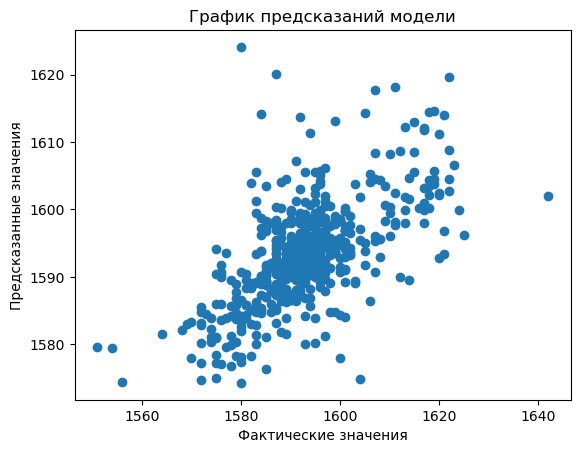

In [101]:
plt.plot(target_valid, predictions, 'o')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('График предсказаний модели')
plt.show()

Если точки расположены близко к прямой y=x, то это говорит о хорошем качестве модели. Если же точки расположены далеко от прямой, то это может указывать на необходимость улучшения модели. В данном случае, качество можно считать достаточно хорошим.

Сравним с константной моделью:

In [102]:
model_dummy = DummyRegressor()
model_dummy.fit(features_train, target_train)
predictions_dummy = model_dummy.predict(features_valid)
mae_dummy = mean_absolute_error(target_valid, predictions_dummy)
print('MAE:', mae_dummy) 

MAE: 8.060181554103112


MAE нашей итоговой модели (6.28) выше, чем у константной модели - значит все хорошо.

#### Исследование важности признаков

Еще раз обучим модель на объединенных тренировочных и валидационных признаках (features_train и features_valid) и соответствующих им целевых значениях (target_train и target_valid). Затем вычислим важность с помощью feature_importances_

In [103]:
best_model.fit(np.concatenate((features_train, features_valid)), np.concatenate((target_train, target_valid)))
feature_importances = best_model.feature_importances_

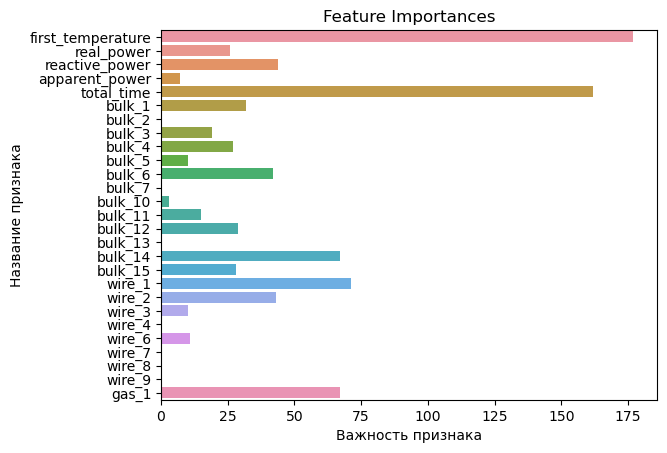

In [104]:
feature_names = list(features.columns)
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Важность признака')
plt.ylabel('Название признака')
plt.show()

По графику видно, что самым значимым признаком оказалась первая температура, на втором месте - общее время нагрева.

### Вывод

Была проведена обработка данных - заполнены пропуски нулями в bulk и wire. В arc и temp были удалены аномальные значения и значения, где только один замер. Также в этих же данных были доавбелны новые признкаи для дальнейшей работы - полная мощность, время нагрева и первая/конечная температура.

Рассмотрели матрицу корреляций и удалили признаки, которые имели сильную связь друг с другом.

Далее все файлы были объединены в один датасет и он был разбит на выборки (test и valid). В качестве моделей были взяты следюущие: RandomForestRegressor, CatBoostRegressor, LightGBM, LogisticRegression. Подбор наилучших параметров осуществлялся с помощью GridSearch. Итоговым показателем, по которому делался вывод, был MAE - средняя абсолютная ошибка. Наиболее хороший MAE получился на модели LGBMRegressor и был равен _6.21_, R2: _0.68_ с параметрами:

    Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'random_state': 50623}
    Время выполнения: {0.35417842070261635}
    
На итоговой выборке показтель MAE оказался равен: _6.28_ , а R2: _0.38_. MAE достаточно хороший (<6.3), а вот показатель R2 весьма плохой, в идеале, он должен стремится к 1, обратное говорит о не очень хорошоей обучаемости модели.
    
После провелось исследование важности признаков и построенный график показал, что самым значимым признаком оказалась первая температура, на втором месте - общее время нагрева.

## Отчет

### План и итоговое решение

Весь проект был выполнен, опираясь на план, описанный в самом начале. Были выполнены все пункты: проведен начальный анализ данных - вывод общей информации о датасатетах, пропусках и сделана графичекая визуализация для каждого файла. Далее была выполнена предобработка: удалены аномальные значения и некоторые столбцы (пустые или вызывающие мультиколлинеарность), изменены типы столбцов, заполнены пропсуки там, где это возможно (в добавках - wire и bulk было заполнено нулями), и, в конце концов, все файлы были объеденены в один с помощью inner по столбцу key. После предобработки последовало обучение нескольких моделей, подбор гиперпараметров и поиск лучшей модели с наименьшим показателем MAE, которая, в последствии, была использована для тестовой выборки. Проведено исследование значимости признаков.

### Трудности

Наиболее трудным из этих этапов была предобработка, т.к. от качества ее проведения зависит показатели моделей в дальнейшем. Трудность, скорее, заключалась в масштабности данных и не очень знакомой предметной области. С объемными данными удалось разобраться просто по-тихоньку следуя плану, а недостающие знания в предметной области получилось найти в инетрнете (например, как высчитывать полную мощность).

### Признаки и предобработка

Предобработка, пожалуй, наиболее важный этап, поскольку, как я писала выше, от него зависит результат обучения моделей. Помимо работы с пропусками, аномальными значениями и типами данных были добавлены несколько новых признаков, которых изначально в данных не было. Это <i>полная мощность</i> (apparent_power), полученная по формуле: $$S = \sqrt{P^2 + Q^2}$$

Где P - активная мощность, а Q - реактивная. <i>Начальная температура</i> (first_temperature) и <i>конечная температура</i> (last_temperature), полученные выделением температуры вначале итерации и в конце. И <i>общее время</i> нагрева (total_time), полученное сложением продолжительности каждой итерации. 

Все эти признаки учавствовали в обучении моделей вместе со всеми оставшимимся, за исключением удаленных (а именно: все признаки, содержащие даты, bulk_8, bulk_9, wire_5) и, соответсвенно, ключа (key). 

Т.е. в работу были включены: 8 признаков из файла wire (данные о проволочных материалах (объём)); 13 признаков из файла bulk (данные о подаче сыпучих материалов (объём)); признак gas - данные о продувке сплава газом; активная и реактивные мощности из файла arc.

Была произведена работа с корреляцией и удалены различные мультиколлинеарные признаки (bulk_8, bulk_9, wire_5). Итоговая таблица корреляции с целевым признаком получилась следующая:

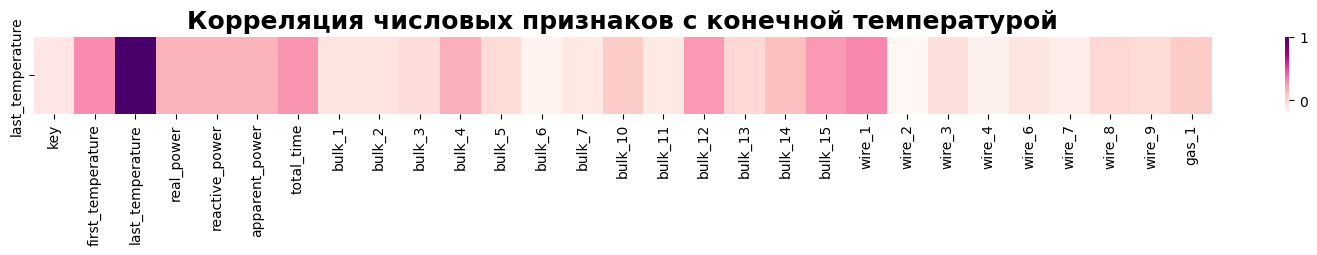

<u>Целевым признаком была выбрана конечная температура. </u>

Перед обучением моделей, чтобы избежать разного масштаба признаков, была произведена стандартизация с помощью scaler.

### Модель

Для обучения были взяты 4 модели: RandomForestRegressor, CatBoostRegressor, LightGBM, LinearRegression. Параметры подбирались с помщью GridSearch. Наилучшим образом на трейне себя показала LightGBM:

    Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'random_state': 50623}
    MAE: {6.214507416093872}
    r2: {0.6843987733074762}
    Время выполнения: {0.23571797609329223}
    
Показатель MAE был ниже 6.3 - это вполне хороший результат. Коэффициент детерминации, равный _0.68_, тоже говорит о неплохом качестве обучения модели. 

Эта же модель была выбрана для тестирования на валидационной выборке с найденными параметрами и были получены следующие резльтаты:

    MAE = 6.28
    R2 = 0.38
    
Было также проведено исследование важности признаков. По графику видно, что самым значимым признаком оказалась первая температура, на втором месте - общее время нагрева:

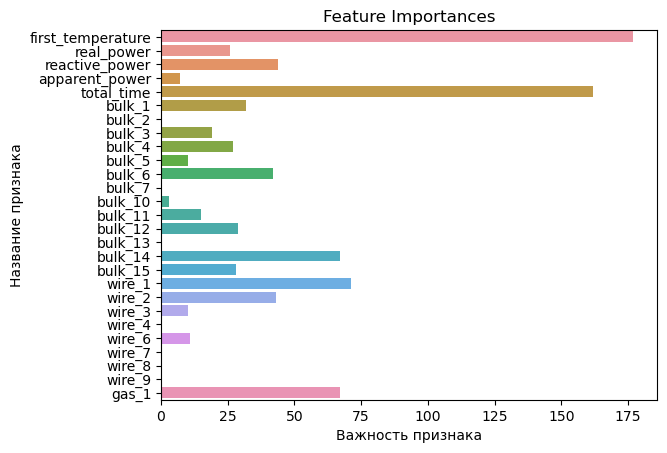

Метрика MAE на итоговоц модели на валидационно выборке все также осталась ниже 6.3, что говорит о том, что поставленная перед нами задача выполнена. 